In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

def deriv2(x, y):
    return -y[0]

# Boundary conditions.

BC_a = 0.0
BC_ya = 1.0
BC_b = 1.0
BC_yb = 2.0

# Integration step and bisection tolerance.

dx = 0.01
tol = 1.e-4

# Range to search for a solution.

zl = 0.0
zr = 5.0

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, b, dx):
    x = a
    y = np.array([ya, ypa])
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y
    
def g(z):
    x, y = integrate(f, BC_a, BC_ya, z, BC_b, dx)
    return y[0]-BC_yb

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1
        print(n, zl, func(zl), zr, func(zr))

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    return zl + (zr-zl)*(-gl)/(gr-gl)

def main():

    global zl, zr
    n,zl,zr = bisect(g, zl, zr, tol)

    print("Root lies in range (%f, %f) after %d iterations"%(zl, zr, n))
    print("Function value =", g(0.5*(zl+zr)))

    zs = secant1(g, zl, zr)
    print('After secant iteration, z =', zs, 'function value =', g(zs))

In [2]:
main()

1 0.0 -1.4596976940621147 2.5 0.6439797678436068
2 1.25 -0.4078589631092542 2.5 0.6439797678436068
3 1.25 -0.4078589631092542 1.875 0.11806040236717585
4 1.5625 -0.14489928037103894 1.875 0.11806040236717585
5 1.71875 -0.013419439001931543 1.875 0.11806040236717585
6 1.71875 -0.013419439001931543 1.796875 0.05232048168262082
7 1.71875 -0.013419439001931543 1.7578125 0.019450521340345084
8 1.71875 -0.013419439001931543 1.73828125 0.003015541169205882
9 1.728515625 -0.0052019489163619426 1.73828125 0.003015541169205882
10 1.7333984375 -0.0010932038735773641 1.73828125 0.003015541169205882
11 1.7333984375 -0.0010932038735773641 1.73583984375 0.0009611686478141479
12 1.734619140625 -6.601761288127506e-05 1.73583984375 0.0009611686478141479
13 1.734619140625 -6.601761288127506e-05 1.7352294921875 0.0004475755174664364
14 1.734619140625 -6.601761288127506e-05 1.73492431640625 0.00019077895229147046
15 1.734619140625 -6.601761288127506e-05 1.734771728515625 6.238066970576384e-05
16 1.73469543

In [40]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

nonlin = 1

def deriv2(x, y):
    if nonlin == 0:
        return -y[0]
    else:
        return -y[0] - 10*y[0]**3

# Boundary conditions.

BC_a = 0.0
BC_ya = 1.0
BC_b = 1.0
BC_yb = 2.0

# Integration step and bisection tolerance.

dx = 0.001
tol = 1.e-4

# Range to search for a solution.

if nonlin == 0:
    zlin = -1.0
    zrin = 5.0
else:
    zlin = -100.0
    zrin = 100.0

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, b, dx):
    x = a
    y = np.array([ya, ypa])
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y
    
def g(z):
    x, y = integrate(f, BC_a, BC_ya, z, BC_b, dx)
    return y[0]-BC_yb

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = BC_a
    y = np.array([BC_ya, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():

    zl = zlin
    zr = zrin

    n = 501
    zz = np.linspace(zl, zr, n)
    gg = np.zeros(n)
    for i in range(n):
        gg[i] = g(zz[i])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(zz, gg)
    plt.plot([zl,zr], [0.,0.], 'r--')
    plt.xlim(zl, zr)
    plt.xlabel('z')
    plt.ylabel('g(z)')

    # Adjust limits if they don't straddle a root.

#     gl = g(zl)
#     while gl*g(zr) > 0: zr -= 1

    i = 0
    temp_zl = zz[i]
    temp_gl = gg[i]
    temp_zr = 0
    temp_gr = 0
    root_list = []
    root_pos_list = []
    
    while i != (n-1):
        i += 1
#         print(temp_zl, zz[i], i, n)
        if (np.sign(gg[i]) != np.sign(temp_gl)):
            if gg[i] == 0:
                root_list.append(gg[i])
            else:
                
#                 print(temp_zl, val)
                temp_zr = zz[i]
                m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
                zs = secant1(g, zzl, zzr)
                root_list.append(zs)    
                print('Root at =',zs)
            
            temp_zl = zz[i]
            temp_gl = gg[i]


    
#     for val in gg:
#         if (np.sign(temp_zl)) == np.sign(val)) and (val != 0):
#             pass
#         elif (np.sign(g(temp_zl)) != np.sign(val)) and (val != 0):
#             print(temp_zl, val)
#             temp_zr = val
#             n,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
#             zs = secant1(g, zzl, zzr)
#             root_list.append(zs)    
#             print('Root at =',zs)
#             temp_zl = val
#         else:
#             pass

    plt.subplot(1,2,2)
    #n,zzl,zzr = bisect(g, zl, zr, 1.e-6)
    #print "Root lies in (%f, %f) after %d iterations"%(zzl, zzr, n)
    #print "Function value =", g(0.5*(zzl+zzr))
    #zs = secant1(g, zzl, zzr)
    for z_i in root_list:
        plotz(f, z_i)
    print('z =', zs, 'g(z) =', g(zs))
    plotz(f, zs)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

Root at = -82.63173243106135
Root at = -46.987081631668495
Root at = -33.257474369147985
Root at = 14.11540741190338
Root at = 20.863833750358022
Root at = 51.030621219548046
Root at = 70.578037319942
z = 70.578037319942 g(z) = -9.170442183403793e-14


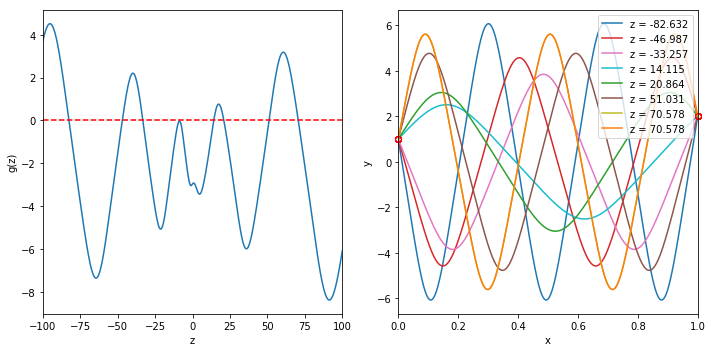

In [41]:
main()

In [48]:
def deriv2(x, y):
    if -3 < x < 3:
        u_x = x**2
    else:
        u_x = 0

    return -y[2]*y[0] + u_x * y[0]				# y[2] is the eigenvalue z

# Boundary conditions.

BC_a = -3.0
BC_ya = 0.0
BC_b = 3.0
BC_yb = 0.0

# Integration step and bisection tolerance.

dx = 0.01
tol = 1.e-4

# Range to search for a solution.

zlin = 5.0
zrin = 30.0

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y), 0.]) 	# z' = 0

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, z, b, dx):
    x = a
    y = np.array([ya, ypa, z])			# z is the eigenvalue
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y

def g(z):
    x, y = integrate(f, BC_a, BC_ya, 1.0, z, BC_b, dx)
    return y[0]-BC_yb

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = BC_a
    y = np.array([BC_ya, 1.0, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():

#     zl = zlin
#     zr = zrin

#     n,zzl,zzr = bisect(g, zl, zr, 1.e-6)
#     #print "Root lies in (%f, %f) after %d iterations"%(zzl, zzr, n)
#     #print "Function value =", g(0.5*(zzl+zzr))
#     zs = secant1(g, zzl, zzr)
#     print('z =', zs, 'g(z) =', g(zs))
#     plotz(f, zs)
#     plt.legend(loc='best')

    zl = zlin
    zr = zrin

    n = 200
    zz = np.linspace(zl, zr, n)
    gg = np.zeros(n)
    for i in range(n):
        gg[i] = g(zz[i])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(zz, gg)
    plt.plot([zl,zr], [0.,0.], 'r--')
    plt.xlim(zl, zr)
    plt.xlabel('z')
    plt.ylabel('g(z)')

    # Adjust limits if they don't straddle a root.

#     gl = g(zl)
#     while gl*g(zr) > 0: zr -= 1

    i = 0
    j = 0
    temp_zl = zz[i]
    temp_gl = gg[i]
    temp_zr = 0
    temp_gr = 0
    root_list = []
    root_pos_list = []
    
    while i != (n-1):
        i += 1
#         print(temp_zl, zz[i], i, n)
        if (np.sign(gg[i]) != np.sign(temp_gl)):
            if gg[i] == 0:
                root_list.append(gg[i])
            else:
                
#                 print(temp_zl, val)
                temp_zr = zz[i]
                m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
                zs = secant1(g, zzl, zzr)
                root_list.append(zs)    
                print('Root at =',zs)
            
            temp_zl = zz[i]
            temp_gl = gg[i]
            j += 1
        if j == 3:
            break

#     for val in gg:
#         if (np.sign(temp_zl)) == np.sign(val)) and (val != 0):
#             pass
#         elif (np.sign(g(temp_zl)) != np.sign(val)) and (val != 0):
#             print(temp_zl, val)
#             temp_zr = val
#             n,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
#             zs = secant1(g, zzl, zzr)
#             root_list.append(zs)    
#             print('Root at =',zs)
#             temp_zl = val
#         else:
#             pass

    plt.subplot(1,2,2)
    #n,zzl,zzr = bisect(g, zl, zr, 1.e-6)
    #print "Root lies in (%f, %f) after %d iterations"%(zzl, zzr, n)
    #print "Function value =", g(0.5*(zzl+zzr))
    #zs = secant1(g, zzl, zzr)
    for z_i in root_list:
        plotz(f, z_i)
    print('z =', zs, 'g(z) =', g(zs))
    plotz(f, zs)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    plt.show()

Root at = 5.082254526637127
Root at = 7.328439315212474
Root at = 9.908361013383647
z = 9.908361013383647 g(z) = -9.620776397767372e-15


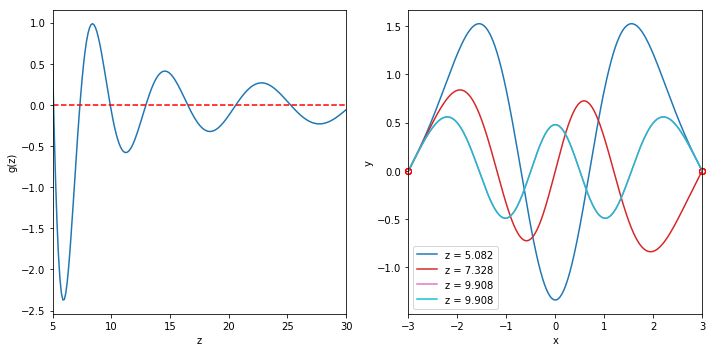

In [49]:
main()

Question 2

In [ ]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

#-----------------------------------------------------------------------
#
# Define the problem.

nonlin = 1

def deriv2(x, y):
    if nonlin == 0:
        return -y[0]
    else:
        return -y[0] - 10*y[0]**3

# Boundary conditions.

BC_a = 0.0
BC_ya = 1.0
BC_b = 1.0
BC_yb = 2.0

# Integration step and bisection tolerance.

dx = 0.001
tol = 1.e-4

# Range to search for a solution.

if nonlin == 0:
    zlin = -1.0
    zrin = 5.0
else:
    zlin = -100.0
    zrin = 100.0

#-----------------------------------------------------------------------

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

def rk4_step(func, x, y, dx):
    dy1 = dx*func(x, y)
    dy2 = dx*func(x+0.5*dx, y+0.5*dy1)
    dy3 = dx*func(x+0.5*dx, y+0.5*dy2)
    dy4 = dx*func(x+dx, y+dy3)
    y += (dy1 + 2*dy2 + 2*dy3 + dy4)/6.
    x += dx
    return x, y

def integrate(func, a, ya, ypa, b, dx):
    x = a
    y = np.array([ya, ypa])
    while x < b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
    return x, y
    
def g(z):
    x, y = integrate(f, BC_a, BC_ya, z, BC_b, dx)
    return y[0]-BC_yb

def bisect(func, zl, zr, tol):
    n = 0
    while zr-zl > tol:
        zm = 0.5*(zl + zr)
        if func(zm)*func(zl) > 0:
            zl = zm
        else:
            zr = zm
        n += 1

    return n,zl,zr

def secant1(g, zl, zr):
    gl = g(zl)
    gr = g(zr)
    return zl + (zr-zl)*(-gl)/(gr-gl)

def plotz(f, z):
    x = BC_a
    y = np.array([BC_ya, z])
    xx = [x]
    yy = [y[0]]
    while x < BC_b-0.5*dx:
        x, y = rk4_step(f, x, y, dx)
        xx.append(x)
        yy.append(y[0])
    plt.plot(xx, yy, label='z = {:.3f}'.format(z))
    plt.xlim(BC_a, BC_b)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot([BC_a], [BC_ya], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')
    plt.plot([BC_b], [BC_yb], 'o', clip_on=False,
             markeredgewidth=1, markeredgecolor='r', markerfacecolor='None')

def main():

    zl = zlin
    zr = zrin

    n = 501
    zz = np.linspace(zl, zr, n)
    gg = np.zeros(n)
    for i in range(n):
        gg[i] = g(zz[i])

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(zz, gg)
    plt.plot([zl,zr], [0.,0.], 'r--')
    plt.xlim(zl, zr)
    plt.xlabel('z')
    plt.ylabel('g(z)')

    # Adjust limits if they don't straddle a root.

#     gl = g(zl)
#     while gl*g(zr) > 0: zr -= 1

    i = 0
    temp_zl = zz[i]
    temp_gl = gg[i]
    temp_zr = 0
    temp_gr = 0
    root_list = []
    root_pos_list = []
    
    while i != (n-1):
        i += 1
#         print(temp_zl, zz[i], i, n)
        if (np.sign(gg[i]) != np.sign(temp_gl)):
            if gg[i] == 0:
                root_list.append(gg[i])
            else:
                
#                 print(temp_zl, val)
                temp_zr = zz[i]
                m,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
                zs = secant1(g, zzl, zzr)
                root_list.append(zs)    
                print('Root at =',zs)
            
            temp_zl = zz[i]
            temp_gl = gg[i]


    
#     for val in gg:
#         if (np.sign(temp_zl)) == np.sign(val)) and (val != 0):
#             pass
#         elif (np.sign(g(temp_zl)) != np.sign(val)) and (val != 0):
#             print(temp_zl, val)
#             temp_zr = val
#             n,zzl,zzr = bisect(g, temp_zl, temp_zr, 1.e-6)
#             zs = secant1(g, zzl, zzr)
#             root_list.append(zs)    
#             print('Root at =',zs)
#             temp_zl = val
#         else:
#             pass

    plt.subplot(1,2,2)
    #n,zzl,zzr = bisect(g, zl, zr, 1.e-6)
    #print "Root lies in (%f, %f) after %d iterations"%(zzl, zzr, n)
    #print "Function value =", g(0.5*(zzl+zzr))
    #zs = secant1(g, zzl, zzr)
    for z_i in root_list:
        plotz(f, z_i)
    print('z =', zs, 'g(z) =', g(zs))
    plotz(f, zs)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()